# Maximum population growth rate ($r_m$) calculations

In [102]:
###### Population growth rate (r_m) calculations #######

rm(list=ls())
graphics.off()

require('tidyverse')
require('patchwork')
require('cowplot')

Here we first calculate the underlying trait TPCs calculate $r_m$, and then mass-correct it.  

In [103]:
# Create argument containing target species

spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
species == 'Halyomorpha halys' ~ '2', 
species == 'Aedes aegypti' ~ '3',
species == 'Anthonomus grandis' ~ '4',
species == 'Paracoccus marginatus' ~ '5',
species == 'Acyrthosiphon pisum' ~ '6',
species == 'Aphis gossypii' ~ '7',
species == 'Bemisia tabaci' ~ '8',
species == 'Tetraneura nigriabdominalis' ~ '9',
species == 'Stethorus punctillum' ~ '10',
species == 'Tetranychus mcdanieli' ~ '11',
species == 'Muscidifurax zaraptor' ~ '12',
species == 'Aphis nasturtii' ~ '13',
species == 'Rhopalosiphum maidis' ~ '14',
species == 'Thrips hawaiiensis' ~ '15',
species == 'Helicoverpa armigera' ~ '16')"

In [104]:
# Read in the trait data

alpha <- as_tibble(read.csv('../data/AlphaPredictions.csv')) %>% 
         select(species, temp, alpha, alphaLwr, alphaUpr) %>%
         mutate(curve_ID = eval(parse(text=spps))) %>%
                              filter(curve_ID != 'NA')
                  
# species <- alpha %>% distinct(species) %>% print(n=50)

head(alpha)

species,temp,alpha,alphaLwr,alphaUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Bemisia tabaci,0.00000000,202.1359,248.5279,170.0677,8
Bemisia tabaci,0.04504505,201.1558,247.2217,169.3005,8
Bemisia tabaci,0.09009009,200.1807,245.9229,168.5369,8
Bemisia tabaci,0.13513514,199.2107,244.6312,167.7770,8
Bemisia tabaci,0.18018018,198.2457,243.3468,167.0208,8
Bemisia tabaci,0.22522523,197.2857,242.0696,166.2683,8


In [105]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
zj <- as_tibble(read.csv('../data/zJPredictions.csv')) %>% 
         select(species, temp, zj, zjLwr, zjUpr) %>%
         mutate(curve_ID = eval(parse(text=spps))) %>%
         filter(curve_ID != 'NA') %>%
         arrange(curve_ID) %>% 
         mutate(temp = as.numeric(temp)) %>%
         rename(zjspecies = species, zjtemp = temp, zjcurve_ID = curve_ID)

In [106]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
z  <- as_tibble(read.csv('../data/zPredictions.csv'))  %>% 
        select(species, temp, z, zLwr, zUpr) %>%
        mutate(curve_ID = eval(parse(text=spps))) %>%
        filter(curve_ID != 'NA') %>%
        arrange(curve_ID) %>% mutate(temp = as.numeric(temp)) %>%
        rename(zspecies = species, ztemp = temp, zcurve_ID = curve_ID)

In [107]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
bmax <- as_tibble(read.csv('../data/BetaPredictions.csv'))  %>% 
          select(species, temp, bmax, bmaxLwr, bmaxUpr) %>%
          mutate(curve_ID = eval(parse(text=spps))) %>%
          filter(curve_ID != 'NA') %>%
          arrange(curve_ID) %>% mutate(temp = as.numeric(temp)) %>%
          rename(bmaxspecies = species, bmaxtemp = temp, bmaxcurve_ID = curve_ID) %>%
          filter(bmaxspecies != 'NA')

In [108]:
df <- bind_cols(alpha, zj, z, bmax) %>% 
      select(curve_ID, species, temp, alpha, alphaLwr, alphaUpr,
             zj, zjLwr, zjUpr, z, zLwr, zUpr, bmax, bmaxLwr, bmaxUpr) %>%
      mutate(kappa = 0.01)

head(df)

curve_ID,species,temp,alpha,alphaLwr,alphaUpr,zj,zjLwr,zjUpr,z,zLwr,zUpr,bmax,bmaxLwr,bmaxUpr,kappa
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Bemisia tabaci,0.00000000,202.1359,248.5279,170.0677,0.01945224,0.07482774,0.008434228,0.1134038,1.0192422,0.04537410,0.05883476,0.01313070,0.1157353,0.01
8,Bemisia tabaci,0.04504505,201.1558,247.2217,169.3005,0.01929008,0.07385970,0.008383188,0.1114940,0.9791129,0.04493682,0.05918183,0.01324965,0.1162211,0.01
8,Bemisia tabaci,0.09009009,200.1807,245.9229,168.5369,0.01912934,0.07290451,0.008332474,0.1096178,0.9433949,0.04450413,0.05953083,0.01336964,0.1167088,0.01
8,Bemisia tabaci,0.13513514,199.2107,244.6312,167.7770,0.01896998,0.07196198,0.008282084,0.1077748,0.9089964,0.04407598,0.05988177,0.01349068,0.1171984,0.01
8,Bemisia tabaci,0.18018018,198.2457,243.3468,167.0208,0.01881200,0.07103194,0.008232015,0.1059643,0.8758682,0.04365233,0.06023467,0.01361277,0.1176899,0.01
8,Bemisia tabaci,0.22522523,197.2857,242.0696,166.2683,0.01865540,0.07011423,0.008182265,0.1041858,0.8439630,0.04319497,0.06058952,0.01373593,0.1181833,0.01


In [109]:
bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
            rename(species = interactor1, mass = avg, mass_sd = sd) %>% 
            mutate(curve_ID = eval(parse(text=spps))) %>%
           filter(curve_ID != 'NA') %>% arrange(curve_ID)

head(bodyMass)

species,mass,mass_sd,curve_ID
<chr>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,159.8000000,NA,1
Stethorus punctillum,0.4800000,0.0424264069,10
Tetranychus mcdanieli,0.0243000,0.0002828427,11
Muscidifurax zaraptor,0.8950000,0.0932737905,12
Aphis nasturtii,0.8673000,0.3252394195,13
Rhopalosiphum maidis,0.2995714,0.1664730780,14


In [110]:
df <- df %>% inner_join(bodyMass)

head(df)

Joining, by = c("curve_ID", "species")



curve_ID,species,temp,alpha,alphaLwr,alphaUpr,zj,zjLwr,zjUpr,z,zLwr,zUpr,bmax,bmaxLwr,bmaxUpr,kappa,mass,mass_sd
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Bemisia tabaci,0.00000000,202.1359,248.5279,170.0677,0.01945224,0.07482774,0.008434228,0.1134038,1.0192422,0.04537410,0.05883476,0.01313070,0.1157353,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.04504505,201.1558,247.2217,169.3005,0.01929008,0.07385970,0.008383188,0.1114940,0.9791129,0.04493682,0.05918183,0.01324965,0.1162211,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.09009009,200.1807,245.9229,168.5369,0.01912934,0.07290451,0.008332474,0.1096178,0.9433949,0.04450413,0.05953083,0.01336964,0.1167088,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.13513514,199.2107,244.6312,167.7770,0.01896998,0.07196198,0.008282084,0.1077748,0.9089964,0.04407598,0.05988177,0.01349068,0.1171984,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.18018018,198.2457,243.3468,167.0208,0.01881200,0.07103194,0.008232015,0.1059643,0.8758682,0.04365233,0.06023467,0.01361277,0.1176899,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.22522523,197.2857,242.0696,166.2683,0.01865540,0.07011423,0.008182265,0.1041858,0.8439630,0.04319497,0.06058952,0.01373593,0.1181833,0.01,0.293125,0.02984454


## Calculate $r_m$ TPCs

In [111]:
############## Calculate $r_m$ TPCs ################

#---------------------------------- Define parameters -------------------------------#

zj    <- df$zj
alpha <- df$alpha
z     <- df$z
bmax   <- df$bmax
k     <- df$kappa

# Calculate rmax
df <- df %>% mutate(rm_opt = (((k+z)*((log(bmax/(k+z)))-(alpha*zj)))/(alpha*(k+z)+1)))

# lower
zj_lwr    <- df$zjLwr
alpha_lwr <- df$alphaLwr
z_lwr     <- df$zLwr
bmax_lwr  <- df$bmaxLwr
k         <- df$kappa

df <- df %>% mutate(rm_optLwr = (((k+z_lwr)*((log(bmax_lwr/(k+z_lwr)))-(alpha_lwr*zj_lwr)))/(alpha_lwr*(k+z_lwr)+1)))

# upper 
zj_upr    <- df$zjUpr
alpha_upr <- df$alphaUpr
z_upr     <- df$zUpr
bmax_upr  <- df$bmaxUpr
k         <- df$kappa

df <- df %>% mutate(rm_optUpr = (((k+z_upr)*((log(bmax_upr/(k+z_upr)))-(alpha_upr*zj_upr)))/(alpha_upr*(k+z_upr)+1)))

write_csv(df, '../results/r_mCalcs.csv')

In [112]:
head(df)

curve_ID,species,temp,alpha,alphaLwr,alphaUpr,zj,zjLwr,zjUpr,z,⋯,zUpr,bmax,bmaxLwr,bmaxUpr,kappa,mass,mass_sd,rm_opt,rm_optLwr,rm_optUpr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Bemisia tabaci,0.00000000,202.1359,248.5279,170.0677,0.01945224,0.07482774,0.008434228,0.1134038,⋯,0.04537410,0.05883476,0.01313070,0.1157353,0.01,0.293125,0.02984454,-0.02222573,-0.09201785,-0.003705995
8,Bemisia tabaci,0.04504505,201.1558,247.2217,169.3005,0.01929008,0.07385970,0.008383188,0.1114940,⋯,0.04493682,0.05918183,0.01324965,0.1162211,0.01,0.293125,0.02984454,-0.02196683,-0.09093305,-0.003573096
8,Bemisia tabaci,0.09009009,200.1807,245.9229,168.5369,0.01912934,0.07290451,0.008332474,0.1096178,⋯,0.04450413,0.05953083,0.01336964,0.1167088,0.01,0.293125,0.02984454,-0.02170863,-0.08987234,-0.003440226
8,Bemisia tabaci,0.13513514,199.2107,244.6312,167.7770,0.01896998,0.07196198,0.008282084,0.1077748,⋯,0.04407598,0.05988177,0.01349068,0.1171984,0.01,0.293125,0.02984454,-0.02145110,-0.08882259,-0.003307386
8,Bemisia tabaci,0.18018018,198.2457,243.3468,167.0208,0.01881200,0.07103194,0.008232015,0.1059643,⋯,0.04365233,0.06023467,0.01361277,0.1176899,0.01,0.293125,0.02984454,-0.02119425,-0.08778361,-0.003174575
8,Bemisia tabaci,0.22522523,197.2857,242.0696,166.2683,0.01865540,0.07011423,0.008182265,0.1041858,⋯,0.04319497,0.06058952,0.01373593,0.1181833,0.01,0.293125,0.02984454,-0.02093806,-0.08675523,-0.003037699


In [113]:
# truncate data for plotting 

rmData <- df %>%
  mutate_at(vars(c(rm_opt)), 
            ~ifelse(rm_opt < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optLwr)), 
            ~ifelse(rm_optLwr < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optUpr)), 
            ~ifelse(rm_optUpr < -0.001, -0.001, .)) %>%
  filter(rm_opt > -0.001)

In [114]:
head(rmData)

curve_ID,species,temp,alpha,alphaLwr,alphaUpr,zj,zjLwr,zjUpr,z,⋯,zUpr,bmax,bmaxLwr,bmaxUpr,kappa,mass,mass_sd,rm_opt,rm_optLwr,rm_optUpr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Bemisia tabaci,4.189189,129.4968,153.3459,112.5061,0.009036291,0.02335263,0.004896275,0.02565910,⋯,0.01770078,0.1008423,0.03000157,0.1705268,0.01,0.293125,0.02984454,-8.291049e-04,-0.001,0.008523007
8,Bemisia tabaci,4.234234,128.8876,152.5636,112.0172,0.008963255,0.02304210,0.004870357,0.02529200,⋯,0.01754168,0.1014192,0.03026590,0.1712830,0.01,0.293125,0.02984454,-6.337900e-04,-0.001,0.008643492
8,Bemisia tabaci,4.279279,128.2816,151.7856,111.5306,0.008890834,0.02273582,0.004844585,0.02493138,⋯,0.01736313,0.1019993,0.03053247,0.1720424,0.01,0.293125,0.02984454,-4.394228e-04,-0.001,0.008767277
8,Bemisia tabaci,4.324324,127.6785,151.0118,111.0463,0.008819022,0.02243372,0.004818957,0.02457715,⋯,0.01721369,0.1025826,0.03080131,0.1728048,0.01,0.293125,0.02984454,-2.460089e-04,-0.001,0.008886208
8,Bemisia tabaci,4.369369,127.0786,150.2422,110.5643,0.008747814,0.02213574,0.004793473,0.02422917,⋯,0.01706911,0.1031689,0.03107242,0.1735704,0.01,0.293125,0.02984454,-5.355329e-05,-0.001,0.009004356
8,Bemisia tabaci,4.414414,126.4816,149.4768,110.0845,0.008677205,0.02184184,0.004768132,0.02388736,⋯,0.01688364,0.1037585,0.03134583,0.1743391,0.01,0.293125,0.02984454,1.379390e-04,-0.001,0.009129352


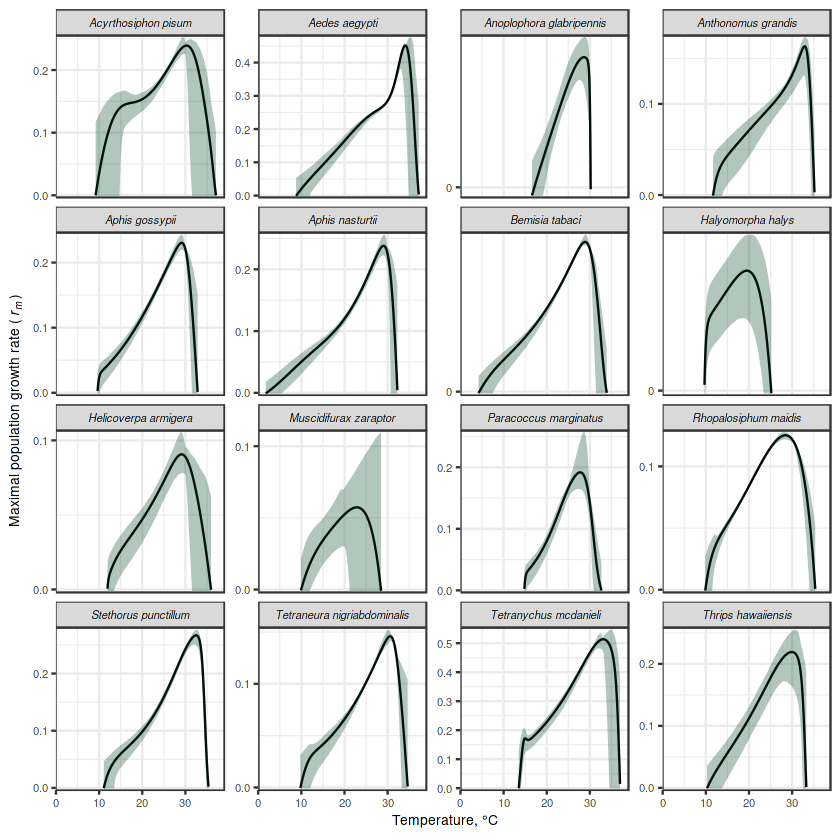

In [115]:
# plot r_m TPCs

rmPlot <- ggplot()+
  geom_line(aes(temp, rm_opt), rmData)+
  facet_wrap(~species, ncol = 4, scales = "free_y")+
  scale_y_continuous(expression(plain(paste(" Maximal population growth rate ("~italic(r[m])~")"))),
                     # limits=c(-0.001,0.6),
                     expand = c(0.01, 0),
                     breaks=seq(0,0.5, by=0.1))+
  theme_bw()+
  geom_ribbon(aes(temp, ymin=rm_optLwr, ymax=rm_optUpr), rmData, fill="#004225",alpha=0.3)+
  theme(text = element_text(size=8))+theme(strip.text = element_text(face = "italic"))+
  labs(x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

rmPlot

In [116]:
save_plot(rmPlot, file="../results/Figs/rmTPCs.pdf", 
          base_height=15, base_width = 17.5, base_asp = 1, units="cm")

## Check for hotteris-better pattern for $r_m$

In [117]:
############ Check for hotteris-better pattern for $r_m$ ##############

#=======================================================================
# plot mass corrected value of r_m at Topt against the peak temperature for r_m

rmMass <- df %>% group_by(species) %>% slice(which.max(rm_opt)) %>%
  select(curve_ID, species, temp, rm_opt, rm_optLwr, rm_optUpr,) %>%
  arrange(curve_ID) 

head(rmMass)

curve_ID,species,temp,rm_opt,rm_optLwr,rm_optUpr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anoplophora glabripennis,28.64865,0.01510338,0.01166602,0.01743328
10,Stethorus punctillum,32.47748,0.26677117,0.24945709,0.27629636
11,Tetranychus mcdanieli,33.10811,0.51367500,0.46943368,0.52333818
12,Muscidifurax zaraptor,22.83784,0.05732966,-0.71649723,0.08449835
13,Aphis nasturtii,29.05405,0.23802002,0.22249497,0.25558833
14,Rhopalosiphum maidis,28.46847,0.12522888,0.12777546,0.12186170


In [118]:
bodyMass <- bodyMass %>% select(mass, curve_ID)

head(bodyMass)

mass,curve_ID
<dbl>,<chr>
159.8000000,1
0.4800000,10
0.0243000,11
0.8950000,12
0.8673000,13
0.2995714,14


In [119]:
rm_data <- rmMass %>% inner_join(bodyMass) %>% select(-curve_ID)

head(rm_data)

write_csv(rm_data, '../results/rm_optSizeScaling.csv')

Joining, by = "curve_ID"



species,temp,rm_opt,rm_optLwr,rm_optUpr,mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,28.64865,0.01510338,0.01166602,0.01743328,159.8000000
Stethorus punctillum,32.47748,0.26677117,0.24945709,0.27629636,0.4800000
Tetranychus mcdanieli,33.10811,0.51367500,0.46943368,0.52333818,0.0243000
Muscidifurax zaraptor,22.83784,0.05732966,-0.71649723,0.08449835,0.8950000
Aphis nasturtii,29.05405,0.23802002,0.22249497,0.25558833,0.8673000
Rhopalosiphum maidis,28.46847,0.12522888,0.12777546,0.12186170,0.2995714


In [120]:
#===================================================
# mass-corrected r_m opt vs r_m Tpks

rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$temp+273.15)); head(rm_data)

species,temp,rm_opt,rm_optLwr,rm_optUpr,mass,kT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,28.64865,0.01510338,0.01166602,0.01743328,159.8000000,38.45119
Stethorus punctillum,32.47748,0.26677117,0.24945709,0.27629636,0.4800000,37.96949
Tetranychus mcdanieli,33.10811,0.51367500,0.46943368,0.52333818,0.0243000,37.89130
Muscidifurax zaraptor,22.83784,0.05732966,-0.71649723,0.08449835,0.8950000,39.20606
Aphis nasturtii,29.05405,0.23802002,0.22249497,0.25558833,0.8673000,38.39961
Rhopalosiphum maidis,28.46847,0.12522888,0.12777546,0.12186170,0.2995714,38.47416


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



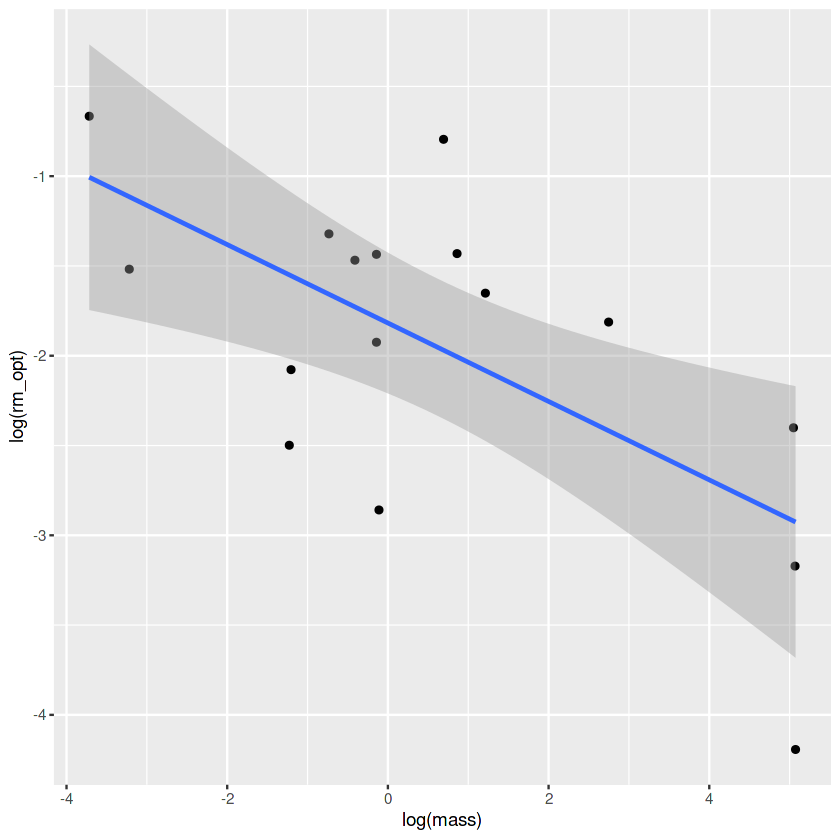

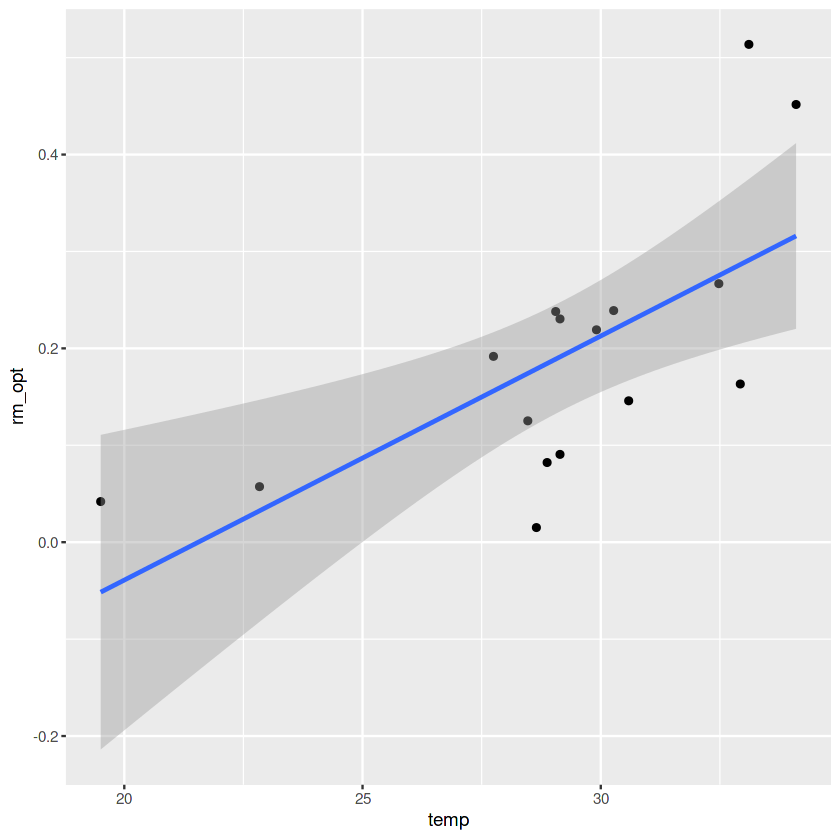

In [121]:
#plot uncorrected data in log-log scale
rm_data %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')

#plot rm_opt vs T
rm_data %>%
  ggplot(aes(x = temp, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

### Mass-correct $r_m$ values

In [96]:
###### Mass-correct $r_m$ values ######

# linear model (note the allometry is linear in log-log scale)
rm_model <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_data)
summary(rm_model)
coef(rm_model)

save(rm_model,file="../results/rm_MTE_model.Rdata")

cf <-  confint(rm_model,level = .95)
anova(rm_model)


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4796 -0.2692  0.1033  0.4119  0.6153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 32.42463   13.62979   2.379   0.0334 *
log(mass)   -0.15841    0.06281  -2.522   0.0255 *
kT          -0.89293    0.35540  -2.512   0.0260 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6066 on 13 degrees of freedom
Multiple R-squared:  0.6114,	Adjusted R-squared:  0.5516 
F-statistic: 10.22 on 2 and 13 DF,  p-value: 0.002148


(Intercept)   log(mass)          kT 
 32.4246291  -0.1584063  -0.8929266

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,5.201957,5.2019565,14.137041,0.002382062
kT,1,2.322824,2.3228243,6.312599,0.025969668
Residuals,13,4.783563,0.3679664,NA,NA


`geom_smooth()` using formula 'y ~ x'



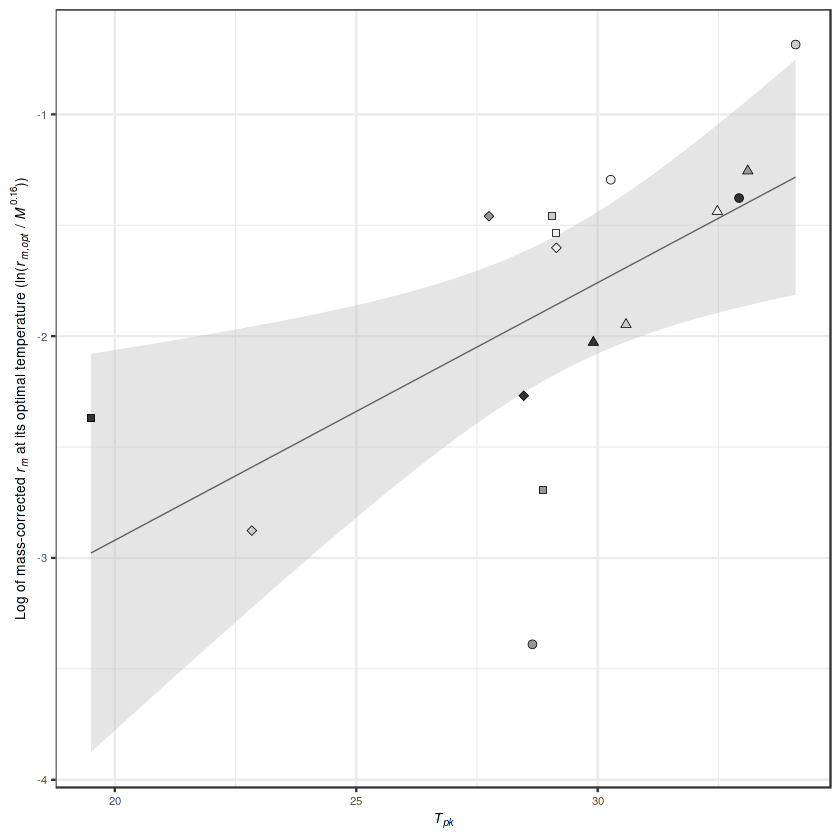

In [97]:
#plot rm_opt in 1/kT, correcting for mass
MassCorr_rm_opt <- 
rm_data %>%
  ggplot(aes(x = temp, y = log(rm_opt/mass^coef(rm_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m]),
                                            " \n at its optimal temperature (ln(",
                                            italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.16),"))"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))))+
  geom_point(aes(shape = species, fill = species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=8),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.2, 'cm'))

MassCorr_rm_opt

# save_plot(MassCorr_rm_opt, file="../results/Figs/MassCorrected_rmopt_vs_Tpk.pdf", 
#           base_height=11,base_width = 10, base_asp = 0.75,units="cm")

## Relationship between $r_{m,opt}$ and $T_{pk}$ of (mass-corrected) $\alpha$

In [98]:
#=======================================================================

######### Relationship between $r_{m,opt}$ and $T_{pk}$ of (mass-corrected) $\alpha$ #########

alphaMass <- as_tibble(read_csv('../data/a_pksT_pksMass.csv')) %>% 
  select(species, a_pk, a_pkLwr, a_pkUpr, mass) %>%
  mutate(curve_ID = case_when(species == 'Anoplophora glabripennis' ~ '1',
                              species == 'Halyomorpha halys' ~ '2',       
                              species == 'Aedes aegypti' ~ '3',
                              species == 'Anthonomus grandis' ~ '4',
                              species == 'Paracoccus marginatus' ~ '5',
                              species == 'Acyrthosiphon pisum' ~ '6',
                              species == 'Aphis gossypii' ~ '7',
                              species == 'Bemisia tabaci' ~ '8',
                              species == 'Tetraneura nigriabdominalis' ~ '9',
                              species == 'Stethorus punctillum' ~ '10',
                              species == 'Tetranychus mcdanieli' ~ '11',
                              species == 'Muscidifurax zaraptor' ~ '12',
                              species == 'Aphis nasturtii' ~ '13',
                              species == 'Rhopalosiphum maidis' ~ '14',
                              species == 'Thrips hawaiiensis' ~ '15',
                              species == 'Helicoverpa armigera' ~ '16')) %>%
  filter(curve_ID != 'NA') %>% 
  rename(alphaspecies = species, alphamass = mass, alphacurve = curve_ID ) %>%
  arrange(alphacurve)

alpharm_data <- bind_cols(rm_data, alphaMass) %>% 
  select(-alphaspecies,-alphamass, -alphacurve)

head(alphaMass)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  a_pk = col_double(),
  a_pkLwr = col_double(),
  a_pkUpr = col_double(),
  species = col_character(),
  curve_ID = col_double(),
  T_pk = col_double(),
  T_pkLwr = col_double(),
  T_pkUpr = col_double(),
  mass = col_double()
)




alphaspecies,a_pk,a_pkLwr,a_pkUpr,alphamass,alphacurve
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.003406889,0.003287144,0.004099603,159.8000000,1
Stethorus punctillum,0.152817553,0.143786897,0.164842838,0.4800000,10
Tetranychus mcdanieli,0.351072594,0.313243262,0.380015452,0.0243000,11
Muscidifurax zaraptor,0.088243612,0.075822488,0.101032337,0.8950000,12
Aphis nasturtii,0.177432627,0.164046663,0.190209096,0.8673000,13
Rhopalosiphum maidis,0.195932374,0.187765397,0.203162603,0.2995714,14


In [99]:
# linear model (note the allometry is linear in log-log scale)
alpharm_model <- lm(log(rm_opt/mass^-0.16) ~ log(a_pk/mass^-0.265), data = alpharm_data)
summary(alpharm_model)
anova(alpharm_model)


Call:
lm(formula = log(rm_opt/mass^-0.16) ~ log(a_pk/mass^-0.265), 
    data = alpharm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74536 -0.24091  0.00072  0.28304  0.65932 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.2232     0.3404  -0.656 0.522676    
log(a_pk/mass^-0.265)   0.7851     0.1554   5.053 0.000176 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4349 on 14 degrees of freedom
Multiple R-squared:  0.6459,	Adjusted R-squared:  0.6206 
F-statistic: 25.54 on 1 and 14 DF,  p-value: 0.0001762


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(a_pk/mass^-0.265),1,4.830366,4.8303661,25.53768,0.0001761814
Residuals,14,2.648053,0.1891466,NA,NA


`geom_smooth()` using formula 'y ~ x'



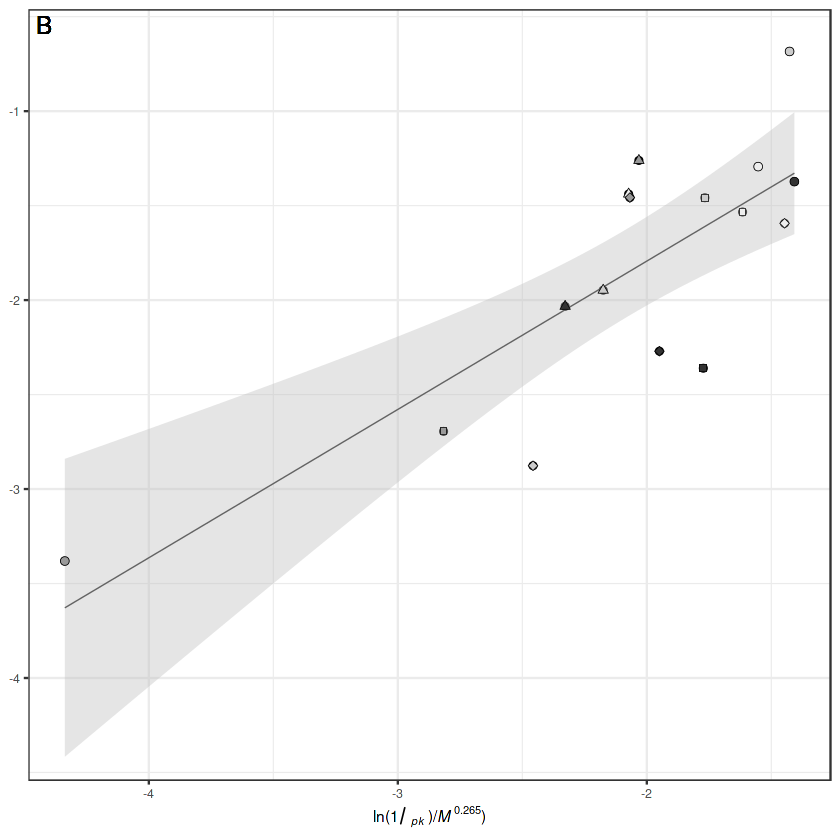

In [100]:
#plot a_pk vs r_opt

MassCorr_rm_opt_vs_AlphaTpk <-
  alpharm_data %>%
  ggplot(aes(x=log(a_pk/mass^-0.265), y = log(rm_opt/mass^-0.16)))+
  geom_point()+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.16),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(1/alpha[pk])~")/",
                                            italic(M^-0.265),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=8,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=9),
        legend.position = 'none',
        legend.text = element_text(size = 5, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.01, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "B"),size = 5, colour = "black")+
  theme(axis.title.y = element_blank())
  
#save_plot(MassCorr_rm_opt_vs_AlphaTpk, file="../results/MassCorr_rm_opt_vs_AlphaTpk.pdf", 
#          base_height=5,base_width = 5, base_asp = 0.75,units="cm")

MassCorr_rm_opt_vs_AlphaTpk

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in gri

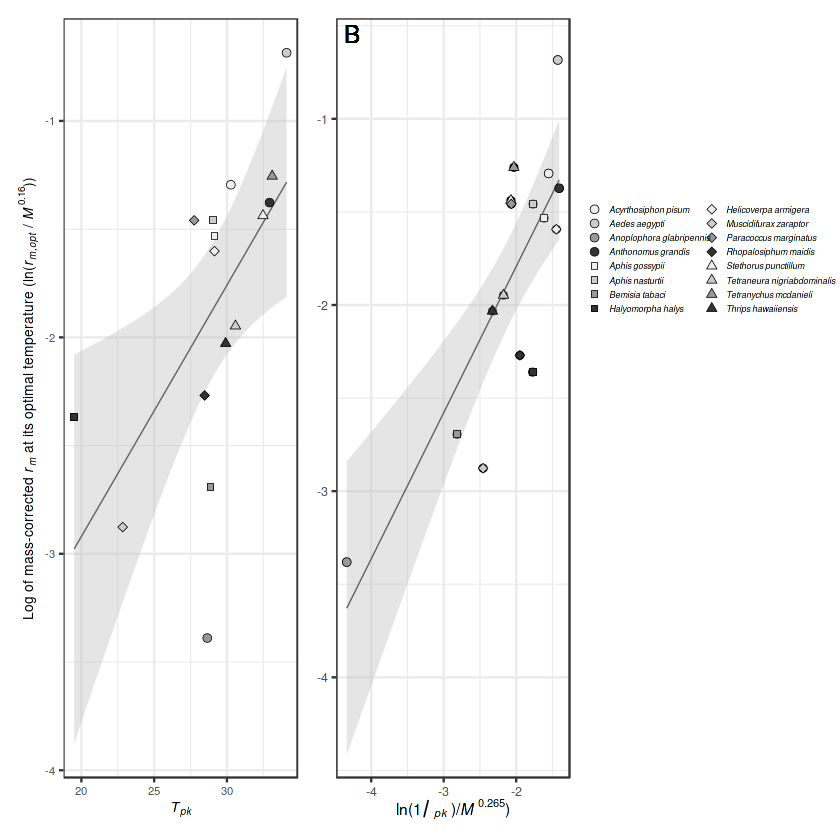

In [101]:
# plot
legend <- get_legend(MassCorr_rm_opt_vs_AlphaTpk + theme(legend.position = c(0.5,0.7)))

rm_calcs_Plot <- plot_grid(MassCorr_rm_opt+MassCorr_rm_opt_vs_AlphaTpk+
                  legend, nrow = 1, rel_widths = c(1,2,1,1))
                    
rm_calcs_Plot

save_plot(rm_calcs_Plot, file="../results/Figs/rm_calcs_Plot.pdf", 
          base_height=7,base_width = 18, base_asp = 0.75,units="cm")